In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load dataset
data = pd.read_csv('prepared_data_book.csv')

# Bỏ các trường dữ liệu không cần thiết
data.drop(columns=['Unnamed: 0', 'product_id', 'title', 'cover_link'], inplace=True)

# Bỏ các giá trị bị thiếu
data.dropna(inplace=True)

# Encode các biến categorical thành numeric
label_encoder = LabelEncoder()
data['category_encoded'] = label_encoder.fit_transform(data['category'])
data['manufacturer_encoded'] = label_encoder.fit_transform(data['manufacturer'])
data['authors_encoded'] = label_encoder.fit_transform(data['authors'])

# Vì đã encode nên ta sẽ bỏ đi các cột dữ liệu cũ
data.drop(columns=['category', 'manufacturer', 'authors'], inplace=True)

# Vì quantity khá lớn nên thay vì tính toán trực tiếp ta sẽ tính log của quantity
data['quantity'] = np.log1p(data['quantity'])



In [2]:
# Split data thành dữ liệu x và target y
X = data.drop(columns=['quantity'])
y = data['quantity']

# Chia thành tập train và tập test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale lại các đặc trưng
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Khởi tạo và huấn luyện mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X_train, y_train)

# Dự đoán dựa trên testing data
y_pred = model.predict(X_test)

# Tính toán MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1.9990549098231671


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Các bước ở trên ta sẽ làm tương tự như với mô hình hồi quy tuyến tính
data = pd.read_csv('prepared_data_book.csv')

data.drop(columns=['Unnamed: 0', 'product_id', 'title', 'cover_link'], inplace=True)

data.dropna(inplace=True)

label_encoder = LabelEncoder()
data['category_encoded'] = label_encoder.fit_transform(data['category'])
data['manufacturer_encoded'] = label_encoder.fit_transform(data['manufacturer'])
data['authors_encoded'] = label_encoder.fit_transform(data['authors'])

data.drop(columns=['category', 'manufacturer', 'authors'], inplace=True)



In [4]:
# Chia data thành đặc trưng x và mục tiêu y
X = data.drop(columns=['quantity'])
y = data['quantity']

# tính log của quantity
y = np.log1p(y)

# Chia thành tập train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Xây dựng mạng neural
model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(8, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(1)
])

# compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# huấn luyện mô hình trên tập train
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Đánh giá MSE trên tập test
mse = model.evaluate(X_test, y_test)
print("Mean Squared Error:", mse)

# áp dụng trên tập test
y_pred = model.predict(X_test)


Epoch 1/50
36/36 [==============================] - 3s 19ms/step - loss: 32.2652 - val_loss: 6.8473
Epoch 2/50
36/36 [==============================] - 0s 5ms/step - loss: 18.3342 - val_loss: 5.7409
Epoch 3/50
36/36 [==============================] - 0s 5ms/step - loss: 14.7557 - val_loss: 7.5350
Epoch 4/50
36/36 [==============================] - 0s 5ms/step - loss: 14.0689 - val_loss: 6.4298
Epoch 5/50
36/36 [==============================] - 0s 5ms/step - loss: 13.8292 - val_loss: 5.8019
Epoch 6/50
36/36 [==============================] - 0s 5ms/step - loss: 13.2976 - val_loss: 9.0416
Epoch 7/50
36/36 [==============================] - 0s 5ms/step - loss: 13.6283 - val_loss: 5.3750
Epoch 8/50
36/36 [==============================] - 0s 5ms/step - loss: 12.2867 - val_loss: 6.3154
Epoch 9/50
36/36 [==============================] - 0s 5ms/step - loss: 11.1218 - val_loss: 5.4930
Epoch 10/50
36/36 [==============================] - 0s 5ms/step - loss: 12.6760 - val_loss: 3.8129
Epoch 11

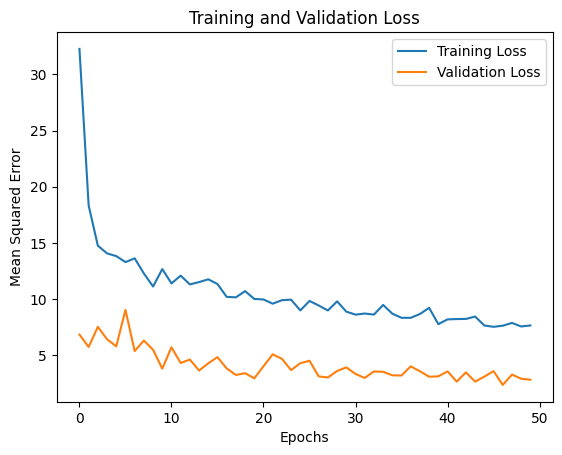

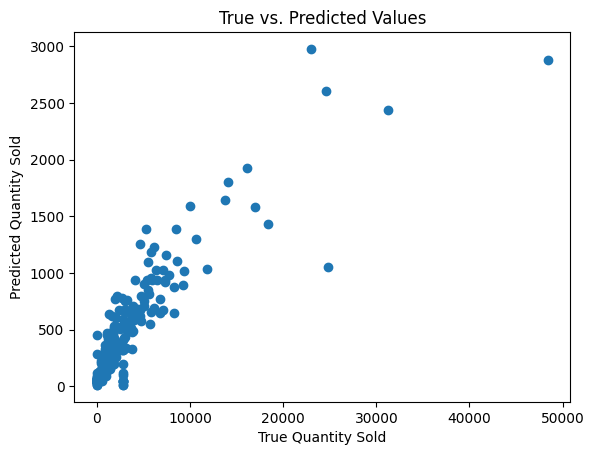

In [5]:
import matplotlib.pyplot as plt

# Biểu diễn train loss và val lost qua từng epoch
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# Biểu diễn giá trị thực và giá trị dự đoán của số lượng sách được bán
plt.scatter(np.expm1(y_test), np.expm1(y_pred))
plt.xlabel('True Quantity Sold')
plt.ylabel('Predicted Quantity Sold')
plt.title('True vs. Predicted Values')
plt.show()


